In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from raw_data import raw_data
from summary import summary

In [2]:
data = raw_data(spark)
print(summary(data))

summary      count                mean              stddev           min  \
fips        472845  32090.929560135344   17822.43038156937         10001   
county      472845                None                None     Abbeville   
state       472845                None                None       Alabama   
lat         472845   37.16590280583528   8.661136246041597       -14.271   
long        472845  -89.16037523030538  21.543757258895052  -100.0307514   
date        472845                None                None    2020-01-22   
cases       472845  197.52325180555997   2565.511604838583             0   
state_code  472845                None                None            AK   
deaths      472845  11.220120758388056  241.09450721139822             0   

summary             max  
fips                 NA  
county          Ziebach  
state           Wyoming  
lat         69.31479216  
long           145.6739  
date         2020-06-14  
cases               999  
state_code           WY  
death

In [3]:
filtered_data = data.filter("date between '2020-04-01' and '2020-04-30'")

In [4]:
print(summary(filtered_data))

summary     count                mean              stddev           min  \
fips        97830  32090.929560135344  17822.502847206546         10001   
county      97830                None                None     Abbeville   
state       97830                None                None       Alabama   
lat         97830  37.165902805835664   8.661171354051977       -14.271   
long        97830  -89.16037523030928   21.54384458675045  -100.0307514   
date        97830                None                None    2020-04-01   
cases       97830  199.85943984462844   2374.975650490361             0   
state_code  97830                None                None            AK   
deaths      97830   10.44590616375345  231.97582221335375             0   

summary             max  
fips                 NA  
county          Ziebach  
state           Wyoming  
lat         69.31479216  
long           145.6739  
date         2020-04-30  
cases               998  
state_code           WY  
deaths         

In [5]:
def select_data(data, start_date, end_date):
    return data.filter("date between '{}' and '{}'".format(start_date, end_date))

In [9]:
filtered_data = select_data(data, '2020-04-01', '2020-06-15')
print(summary(filtered_data))

summary      count                mean              stddev           min  \
fips        244575  32090.929560135344  17822.448025295274         10001   
county      244575                None                None     Abbeville   
state       244575                None                None       Alabama   
lat         244575  37.165902805836204   8.661144794039547       -14.271   
long        244575  -89.16037523031021  21.543778521231594  -100.0307514   
date        244575                None                None    2020-04-01   
cases       244575  377.41607277931104   3552.813319770906             0   
state_code  244575                None                None            AK   
deaths      244575  21.585709904937136  334.77811687039843             0   

summary             max  
fips                 NA  
county          Ziebach  
state           Wyoming  
lat         69.31479216  
long           145.6739  
date         2020-06-14  
cases               999  
state_code           WY  
death

In [10]:
filtered_data.limit(100).toPandas()

,fips,county,state,lat,long,date,cases,state_code,deaths
0,13139,Hall,Georgia,34.32207823,-83.81896936,2020-04-01,69,GA,0
1,13139,Hall,Georgia,34.32207823,-83.81896936,2020-04-02,72,GA,0
2,13139,Hall,Georgia,34.32207823,-83.81896936,2020-04-03,79,GA,0
3,13139,Hall,Georgia,34.32207823,-83.81896936,2020-04-04,84,GA,0
4,13139,Hall,Georgia,34.32207823,-83.81896936,2020-04-05,117,GA,0
...,...,...,...,...,...,...,...,...,...
95,13141,Hancock,Georgia,33.2721566,-82.99766919,2020-04-21,10,GA,0
96,13141,Hancock,Georgia,33.2721566,-82.99766919,2020-04-22,11,GA,0
97,13141,Hancock,Georgia,33.2721566,-82.99766919,2020-04-23,14,GA,0
98,13141,Hancock,Georgia,33.2721566,-82.99766919,2020-04-24,16,GA,0


In [11]:
import pyspark.sql.functions as f
import pandas as pd

In [12]:
avg_per_day = filtered_data.groupBy('date').agg(f.avg('cases')).toPandas()

In [13]:
avg_per_day['date']=pd.to_datetime(avg_per_day['date'])

In [14]:
avg_per_day.head()

,date,avg(cases)
0,2020-04-13,178.414597
1,2020-06-08,601.588776
2,2020-04-12,170.658387
3,2020-04-20,240.329960
4,2020-06-09,607.135235


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

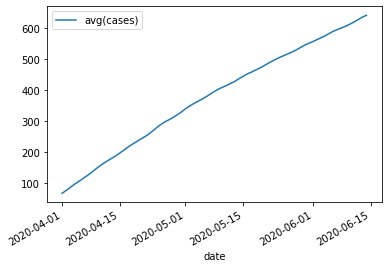

In [16]:
avg_per_day.plot(kind='line', x='date', y='avg(cases)')